k = 2, Distance Metric = euclidean, Accuracy = 0.99
k = 2, Distance Metric = cosine, Accuracy = 0.08
k = 5, Distance Metric = euclidean, Accuracy = 0.98
k = 5, Distance Metric = cosine, Accuracy = 0.04
k = 7, Distance Metric = euclidean, Accuracy = 0.96
k = 7, Distance Metric = cosine, Accuracy = 0.04
k = 11, Distance Metric = euclidean, Accuracy = 0.955
k = 11, Distance Metric = cosine, Accuracy = 0.05
k = 2, Distance Metric = euclidean, Accuracy (Fewer Training Images) = 0.57
k = 2, Distance Metric = cosine, Accuracy (Fewer Training Images) = 0.07
k = 5, Distance Metric = euclidean, Accuracy (Fewer Training Images) = 0.475
k = 5, Distance Metric = cosine, Accuracy (Fewer Training Images) = 0.05
k = 7, Distance Metric = euclidean, Accuracy (Fewer Training Images) = 0.505
k = 7, Distance Metric = cosine, Accuracy (Fewer Training Images) = 0.04
k = 11, Distance Metric = euclidean, Accuracy (Fewer Training Images) = 0.425
k = 11, Distance Metric = cosine, Accuracy (Fewer Training Images)

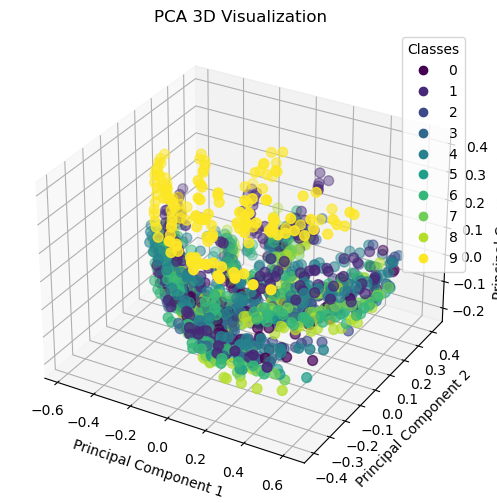

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have loaded your dataset into a DataFrame called df
df= pd.read_csv("C:\\Users\\Nexgen\\Desktop\\dataset.csv", header=None)

# Task 1: Pre-processing and data splitting
vector_columns = list(range(1024))  # Assuming 1024 is the total number of columns

# Calculate the magnitude of each face image vector
df['Magnitude'] = np.linalg.norm(df[vector_columns], axis=1)

# Divide each vector by its magnitude to normalize it to unit length
for col in vector_columns:
    df[col] = df[col] / df['Magnitude']

# Drop the 'Magnitude' column if no longer needed
df.drop(columns=['Magnitude'], inplace=True)

# Splitting data into training and testing sets for each subject
X_train, X_test, y_train, y_test = [], [], [], []

for i in range(10):
    subject_data = df.iloc[i*170:(i+1)*170]
    train_data, test_data = train_test_split(subject_data, train_size=150, test_size=20, random_state=42)
    X_train.append(train_data[vector_columns].values)
    X_test.append(test_data[vector_columns].values)
    y_train.append([i]*150)
    y_test.append([i]*20)

X_train = np.concatenate(X_train)
X_test = np.concatenate(X_test)
y_train = np.concatenate(y_train)
y_test = np.concatenate(y_test)

# Task 2: Implementing k-NN classifier
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def cosine_similarity(x1, x2):
    return np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))

class KNN:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        if self.distance_metric == 'euclidean':
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        elif self.distance_metric == 'cosine':
            distances = [cosine_similarity(x, x_train) for x_train in self.X_train]
        else:
            raise ValueError('Invalid distance metric')

        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.argmax(np.bincount(k_nearest_labels))
        return most_common

# Task 2: Evaluation with different k values
k_values = [2, 5, 7, 11]
distance_metrics = ['euclidean', 'cosine']

for k in k_values:
    for metric in distance_metrics:
        knn = KNN(k=k, distance_metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"k = {k}, Distance Metric = {metric}, Accuracy = {accuracy}")

# Task 2b: Evaluation with fewer training images
X_train_few, _, y_train_few, _ = train_test_split(X_train, y_train, train_size=100, random_state=42)

for k in k_values:
    for metric in distance_metrics:
        knn = KNN(k=k, distance_metric=metric)
        knn.fit(X_train_few, y_train_few)
        y_pred_few = knn.predict(X_test)
        accuracy_few = accuracy_score(y_test, y_pred_few)
        print(f"k = {k}, Distance Metric = {metric}, Accuracy (Fewer Training Images) = {accuracy_few}")

# Task 3: Comparison with SVM and GaussianNB (using sklearn)
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_accuracy = svm.score(X_test, y_test)
print(f"SVM Accuracy: {svm_accuracy}")

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_accuracy = nb.score(X_test, y_test)
print(f"GaussianNB Accuracy: {nb_accuracy}")

# Task 4: Dimensionality reduction and visualization
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='viridis', s=50)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.title('PCA 3D Visualization')
plt.show()
